## ***Bachelor's Project ( Predicting Students Score)***


In the first step i convert the dataset(xlsx) to csv file.

In [1]:
# TODO:TASK1- DATA CLEANING EXCEL FILE         (DONE)
# TODO:TASK2- PREPROCESSING                    (DONE)
# TODO:TASK3- DATA AUGMENTATION                (DONE)        
# TODO:TASK4- BAGGING+RANDOM FOREST ON DATASET (DONE)
# TODO:TASK5- REGRESSION ON EACH LESSON        (DONE)
# TODO:TASK6- 5 LESSON WITH ON REGRESSION      (DONE)                       
# TODO:TASK7- K-FOLD CROSS-VALIDATION          (DONE)
# TODO:TASK8- EVALUATION MODULE                (DONE)
# TODO:TASK9- CLASSIFICATION-SVM MODEL         (DONE)       
# TODO:TASK10-ADDING DEEP LAYERS               (DONE)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy.stats as ss
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
%matplotlib inline
read_file = pd.read_excel(r'data set nahaei complete edition (Autosaved).xlsx')
read_file.to_csv(r'/home/yazdan/Desktop/dr akhlaghian reading/project yazdan/ds.csv',index = None, header= True)


## Data Cleaning 

In [3]:
dataframe = pd.read_csv('ds.csv')
dataframe.head()

,row,stu num,riazi 1,fizik 1,mabani kamputer,riazi 2,fizik 2,ri gosaste,barname pishrafte,moadelat def,...,memari com,mabani e didit,o va m modiriat,os,tarahi alg,nazariye,os tarahi DB,eghtesad mohandesi,moadel-T4,sex
0,1,8513331010,13.25,8.50,20.0,11.75,10.00,12.50,20.0,10.0,...,15.75,14.0,16.5,12.0,16.2,10.75,18.0,17.8,14.42,m
1,2,8513331030,10.00,11.00,10.0,14.00,11.50,10.25,5.5,13.0,...,16.50,14.0,16.0,14.0,15.5,11.50,15.0,14.6,14.27,f
2,3,8513331040,14.25,12.50,15.6,15.00,16.50,14.50,11.0,18.5,...,17.25,18.5,16.5,16.5,18.2,19.00,14.0,16.1,16.49,f
3,4,8513331050,13.00,8.50,9.5,14.50,14.50,15.00,10.0,14.0,...,15.25,14.0,13.5,12.0,14.0,12.50,12.5,13.2,13.94,f
4,5,8513331060,11.00,11.25,9.9,10.00,9.75,8.00,15.2,11.5,...,13.00,12.0,15.5,10.5,12.0,10.00,16.5,10.0,12.80,m


In [4]:
to_drop = ['sex','row','stu num']
dataframe.drop(to_drop, inplace = True, axis=1)

In [5]:
dataframe.head(52)

,riazi 1,fizik 1,mabani kamputer,riazi 2,fizik 2,ri gosaste,barname pishrafte,moadelat def,amar va eh,sakhteman dadeh,...,mabani fanavari,memari com,mabani e didit,o va m modiriat,os,tarahi alg,nazariye,os tarahi DB,eghtesad mohandesi,moadel-T4
0,13.25,8.50,20.00,11.75,10.00,12.50,20.00,10.00,11.75,18.50,...,14.75,15.75,14.00,16.50,12.00,16.20,10.75,18.00,17.80,14.42
1,10.00,11.00,10.00,14.00,11.50,10.25,5.50,13.00,11.50,10.00,...,18.80,16.50,14.00,16.00,14.00,15.50,11.50,15.00,14.60,14.27
2,14.25,12.50,15.60,15.00,16.50,14.50,11.00,18.50,16.75,14.00,...,18.10,17.25,18.50,16.50,16.50,18.20,19.00,14.00,16.10,16.49
3,13.00,8.50,9.50,14.50,14.50,15.00,10.00,14.00,15.50,11.50,...,13.20,15.25,14.00,13.50,12.00,14.00,12.50,12.50,13.20,13.94
4,11.00,11.25,9.90,10.00,9.75,8.00,15.20,11.50,8.00,13.00,...,18.85,13.00,12.00,15.50,10.50,12.00,10.00,16.50,10.00,12.80
5,13.25,8.50,19.00,16.25,9.00,13.50,18.50,16.00,16.25,15.60,...,11.00,15.75,16.00,14.00,13.50,20.00,15.25,15.50,15.00,15.82
6,13.25,13.00,12.90,13.75,12.50,13.00,6.00,14.75,15.00,8.50,...,17.10,16.25,11.50,14.50,13.00,15.50,12.50,17.00,15.80,14.66
7,8.50,7.00,9.75,13.50,11.00,13.65,13.52,9.75,9.00,9.84,...,16.75,14.50,9.50,12.00,11.50,10.00,11.25,12.00,12.00,13.17
8,9.00,7.00,10.00,16.00,11.00,12.50,9.00,9.00,11.50,9.00,...,16.75,14.50,9.50,12.00,11.50,10.00,11.25,12.00,12.00,13.04
9,18.00,18.00,18.50,12.00,17.75,12.50,16.25,14.00,16.75,19.11,...,19.00,13.00,9.50,13.00,12.00,11.00,16.00,19.50,16.10,13.23


### Rename Cols for more understandable data frame

In [6]:
dataframe.columns

Index(['riazi 1', 'fizik 1', 'mabani kamputer', 'riazi 2', 'fizik 2',
       'ri gosaste', 'barname pishrafte', 'moadelat def', 'amar va eh',
       'sakhteman dadeh', 'medar mantaghi', 'mabani fanavari', 'memari com',
       'mabani e didit', 'o va m modiriat', 'os', 'tarahi alg', 'nazariye',
       'os tarahi DB', 'eghtesad mohandesi', 'moadel-T4'],
      dtype='object')

In [7]:
dataframe.columns = ['math1','physics1','computer_programming','math2','physics2','discrete_math'
                    ,'advance_programming','differencial_eq','probability_statistics','ds','logical_circuit'
                    ,'comp_eng1','comp_arch','digital','management','os','algorithm_design','applied_computing'
                    ,'db','eng_economics','4th_Semester_avg']

In [8]:
dataframe.columns

Index(['math1', 'physics1', 'computer_programming', 'math2', 'physics2',
       'discrete_math', 'advance_programming', 'differencial_eq',
       'probability_statistics', 'ds', 'logical_circuit', 'comp_eng1',
       'comp_arch', 'digital', 'management', 'os', 'algorithm_design',
       'applied_computing', 'db', 'eng_economics', '4th_Semester_avg'],
      dtype='object')

There was no missing values or NaN. all of the coloumns are integers because i drop gender column.

# Creating the target column

In [9]:
dataframe.head(280)

,math1,physics1,computer_programming,math2,physics2,discrete_math,advance_programming,differencial_eq,probability_statistics,ds,...,comp_eng1,comp_arch,digital,management,os,algorithm_design,applied_computing,db,eng_economics,4th_Semester_avg
0,13.25,8.50,20.00,11.75,10.00,12.50,20.00,10.00,11.75,18.50,...,14.75,15.75,14.00,16.50,12.00,16.20,10.75,18.00,17.80,14.42
1,10.00,11.00,10.00,14.00,11.50,10.25,5.50,13.00,11.50,10.00,...,18.80,16.50,14.00,16.00,14.00,15.50,11.50,15.00,14.60,14.27
2,14.25,12.50,15.60,15.00,16.50,14.50,11.00,18.50,16.75,14.00,...,18.10,17.25,18.50,16.50,16.50,18.20,19.00,14.00,16.10,16.49
3,13.00,8.50,9.50,14.50,14.50,15.00,10.00,14.00,15.50,11.50,...,13.20,15.25,14.00,13.50,12.00,14.00,12.50,12.50,13.20,13.94
4,11.00,11.25,9.90,10.00,9.75,8.00,15.20,11.50,8.00,13.00,...,18.85,13.00,12.00,15.50,10.50,12.00,10.00,16.50,10.00,12.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,16.50,18.50,18.39,17.50,12.00,15.50,10.30,11.75,11.80,9.87,...,13.50,13.50,15.50,17.50,12.50,11.64,13.50,15.00,18.50,15.54
233,16.00,15.50,10.00,18.00,10.00,20.00,12.11,10.50,10.00,10.70,...,17.50,13.00,15.75,17.75,10.50,10.08,13.00,12.25,14.75,15.07
234,14.00,12.00,18.65,16.50,17.00,13.00,10.00,14.25,14.20,11.12,...,17.75,18.50,19.50,17.00,17.50,11.27,12.25,18.50,17.00,16.39
235,13.00,9.00,13.30,14.00,15.25,11.00,12.88,13.00,15.00,10.86,...,17.75,16.50,15.00,15.00,13.00,14.52,11.75,16.25,17.75,15.42


In [10]:
dataframe['status'] = np.where(dataframe['4th_Semester_avg'] > 12, 'yes', 'no')

In [11]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

In [12]:
dataframe['status'].value_counts()

yes    231
no       6
Name: status, dtype: int64

In [13]:
dataframe['status'] = lb.fit_transform(dataframe['status'])

In [14]:
y = dataframe['status']

# Data Augmentation

In [15]:
import random
random.seed(42)

In [16]:
dataframe

,math1,physics1,computer_programming,math2,physics2,discrete_math,advance_programming,differencial_eq,probability_statistics,ds,...,comp_arch,digital,management,os,algorithm_design,applied_computing,db,eng_economics,4th_Semester_avg,status
0,13.25,8.50,20.00,11.75,10.00,12.50,20.00,10.00,11.75,18.50,...,15.75,14.00,16.50,12.00,16.20,10.75,18.00,17.80,14.42,1
1,10.00,11.00,10.00,14.00,11.50,10.25,5.50,13.00,11.50,10.00,...,16.50,14.00,16.00,14.00,15.50,11.50,15.00,14.60,14.27,1
2,14.25,12.50,15.60,15.00,16.50,14.50,11.00,18.50,16.75,14.00,...,17.25,18.50,16.50,16.50,18.20,19.00,14.00,16.10,16.49,1
3,13.00,8.50,9.50,14.50,14.50,15.00,10.00,14.00,15.50,11.50,...,15.25,14.00,13.50,12.00,14.00,12.50,12.50,13.20,13.94,1
4,11.00,11.25,9.90,10.00,9.75,8.00,15.20,11.50,8.00,13.00,...,13.00,12.00,15.50,10.50,12.00,10.00,16.50,10.00,12.80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,16.50,18.50,18.39,17.50,12.00,15.50,10.30,11.75,11.80,9.87,...,13.50,15.50,17.50,12.50,11.64,13.50,15.00,18.50,15.54,1
233,16.00,15.50,10.00,18.00,10.00,20.00,12.11,10.50,10.00,10.70,...,13.00,15.75,17.75,10.50,10.08,13.00,12.25,14.75,15.07,1
234,14.00,12.00,18.65,16.50,17.00,13.00,10.00,14.25,14.20,11.12,...,18.50,19.50,17.00,17.50,11.27,12.25,18.50,17.00,16.39,1
235,13.00,9.00,13.30,14.00,15.25,11.00,12.88,13.00,15.00,10.86,...,16.50,15.00,15.00,13.00,14.52,11.75,16.25,17.75,15.42,1


In [17]:
def data_aug(df,n):
    """this is the function for creating samples to train our neural network
    n= number of samples we want to create
    df= the dataframe
    """
    if 'status' and '4th_Semester_avg' in df.columns:
        df.drop('status', inplace = True, axis=1)
        df.drop('4th_Semester_avg', inplace = True, axis=1)
    else :
        print('status not exist')

    df2 = df.sample(n,replace= True,random_state = 4)
    plus = df2.iloc[:,[random.randrange(0,19,1) for i in range(10)]]
    plus = plus.loc[:,~plus.columns.duplicated()]
    minus= df2.drop(plus.columns,axis=1)
    plus = plus.applymap(lambda x: x+ 0.25) 
    #print(plus)
    #print("\n \n")
    #print("\n \n")
    minus = minus.applymap(lambda x:x - 0.25)
    #print(minus)
    frames=[plus,minus]
    df = pd.concat(frames,axis = 1,sort=False)
    df['avg_new'] = df.mean(axis=1)
    
    
    return df

In [18]:
new_df = data_aug(dataframe,2000)

In [19]:
new_df.sample(10)

,math2,math1,probability_statistics,differencial_eq,physics2,applied_computing,computer_programming,db,physics1,discrete_math,...,ds,logical_circuit,comp_eng1,comp_arch,digital,management,os,algorithm_design,eng_economics,avg_new
114,10.00,12.25,14.50,18.00,19.25,11.25,13.00,7.95,16.50,11.25,...,9.43,14.50,16.25,10.25,12.50,18.75,11.59,11.81,9.75,12.9015
9,12.25,18.25,17.00,14.25,18.00,16.25,18.75,19.75,17.75,12.25,...,18.86,13.75,18.75,12.75,9.25,12.75,11.75,10.75,15.85,15.2480
7,13.75,8.75,9.25,10.00,11.25,11.50,10.00,12.25,6.75,13.40,...,9.59,13.25,16.50,14.25,9.25,11.75,11.25,9.75,11.75,11.3755
18,12.25,13.25,12.75,10.25,9.75,10.25,18.35,18.75,8.25,9.75,...,12.65,11.00,15.00,15.50,14.75,14.75,14.25,13.35,15.15,13.1375
12,14.75,11.50,19.25,17.25,17.00,12.25,10.05,14.75,12.25,14.00,...,9.75,12.75,17.05,13.75,18.75,15.25,11.25,13.25,11.95,13.9675
96,8.75,15.25,10.75,14.75,12.25,12.25,10.05,12.25,12.05,16.75,...,12.44,13.75,11.75,15.25,10.75,19.75,13.25,9.18,18.25,13.1860
96,8.75,15.25,10.75,14.75,12.25,12.25,10.05,12.25,12.05,16.75,...,12.44,13.75,11.75,15.25,10.75,19.75,13.25,9.18,18.25,13.1860
134,16.25,11.25,15.25,10.25,14.00,16.75,10.00,10.25,11.50,13.25,...,9.86,15.00,17.25,9.75,12.75,19.50,15.94,12.00,15.50,13.3025
32,15.50,15.75,11.50,12.25,9.25,10.75,18.45,16.75,9.25,11.75,...,12.95,12.25,16.75,14.50,10.75,12.75,12.25,10.25,12.95,13.1925
132,11.75,11.75,15.75,12.25,18.00,17.00,10.00,8.55,15.75,10.50,...,9.75,15.50,17.75,9.75,9.25,16.25,12.79,11.75,17.50,13.0950


In [20]:
############################################################################################################
dataframe = pd.read_csv('ds.csv')
to_drop = ['sex','row','stu num']
dataframe.drop(to_drop, inplace = True, axis=1)

In [21]:
dataframe.columns = ['math1','physics1','computer_programming','math2','physics2','discrete_math'
                    ,'advance_programming','differencial_eq','probability_statistics','ds','logical_circuit'
                    ,'comp_eng1','comp_arch','digital','management','os','algorithm_design','applied_computing'
                    ,'db','eng_economics','4th_Semester_avg']

In [22]:
dataframe['status'] = np.where(dataframe['4th_Semester_avg'] > 12, 'yes', 'no')
dataframe['status'] = lb.fit_transform(dataframe['status'])

In [23]:
y = dataframe['status']

In [24]:
dataframe

,math1,physics1,computer_programming,math2,physics2,discrete_math,advance_programming,differencial_eq,probability_statistics,ds,...,comp_arch,digital,management,os,algorithm_design,applied_computing,db,eng_economics,4th_Semester_avg,status
0,13.25,8.50,20.00,11.75,10.00,12.50,20.00,10.00,11.75,18.50,...,15.75,14.00,16.50,12.00,16.20,10.75,18.00,17.80,14.42,1
1,10.00,11.00,10.00,14.00,11.50,10.25,5.50,13.00,11.50,10.00,...,16.50,14.00,16.00,14.00,15.50,11.50,15.00,14.60,14.27,1
2,14.25,12.50,15.60,15.00,16.50,14.50,11.00,18.50,16.75,14.00,...,17.25,18.50,16.50,16.50,18.20,19.00,14.00,16.10,16.49,1
3,13.00,8.50,9.50,14.50,14.50,15.00,10.00,14.00,15.50,11.50,...,15.25,14.00,13.50,12.00,14.00,12.50,12.50,13.20,13.94,1
4,11.00,11.25,9.90,10.00,9.75,8.00,15.20,11.50,8.00,13.00,...,13.00,12.00,15.50,10.50,12.00,10.00,16.50,10.00,12.80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,16.50,18.50,18.39,17.50,12.00,15.50,10.30,11.75,11.80,9.87,...,13.50,15.50,17.50,12.50,11.64,13.50,15.00,18.50,15.54,1
233,16.00,15.50,10.00,18.00,10.00,20.00,12.11,10.50,10.00,10.70,...,13.00,15.75,17.75,10.50,10.08,13.00,12.25,14.75,15.07,1
234,14.00,12.00,18.65,16.50,17.00,13.00,10.00,14.25,14.20,11.12,...,18.50,19.50,17.00,17.50,11.27,12.25,18.50,17.00,16.39,1
235,13.00,9.00,13.30,14.00,15.25,11.00,12.88,13.00,15.00,10.86,...,16.50,15.00,15.00,13.00,14.52,11.75,16.25,17.75,15.42,1


In [25]:
################################################################################################

In [26]:
new_df['status'] = np.where(new_df['avg_new'] > 12, 'yes', 'no')

In [27]:
y_new = new_df['status']

In [28]:
y_new.value_counts()

yes    1607
no      393
Name: status, dtype: int64

# Bagging + Random Forest model 

In [29]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   math1                   237 non-null    float64
 1   physics1                237 non-null    float64
 2   computer_programming    237 non-null    float64
 3   math2                   237 non-null    float64
 4   physics2                237 non-null    float64
 5   discrete_math           237 non-null    float64
 6   advance_programming     237 non-null    float64
 7   differencial_eq         237 non-null    float64
 8   probability_statistics  237 non-null    float64
 9   ds                      237 non-null    float64
 10  logical_circuit         237 non-null    float64
 11  comp_eng1               237 non-null    float64
 12  comp_arch               237 non-null    float64
 13  digital                 237 non-null    float64
 14  management              237 non-null    fl

In [30]:
dataframe.describe()

,math1,physics1,computer_programming,math2,physics2,discrete_math,advance_programming,differencial_eq,probability_statistics,ds,...,comp_arch,digital,management,os,algorithm_design,applied_computing,db,eng_economics,4th_Semester_avg,status
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.00000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,12.376371,12.191772,12.600042,13.255907,11.872574,13.797257,12.562574,12.748101,12.51557,12.845823,...,14.039114,13.626624,16.200211,14.143629,12.622068,14.230802,14.261477,14.985443,14.356709,0.974684
std,2.769708,2.997697,3.453875,3.261172,3.250549,3.008442,3.467161,3.213403,2.94171,3.045600,...,2.739918,2.920261,2.352741,2.855541,2.673693,2.916929,2.983818,2.933325,1.347917,0.157417
min,5.500000,6.000000,5.000000,7.000000,6.000000,6.000000,5.500000,5.000000,5.50000,7.750000,...,4.000000,9.500000,9.500000,8.000000,8.000000,9.500000,7.000000,9.000000,11.320000,0.000000
25%,10.250000,10.000000,9.800000,10.000000,9.500000,11.500000,10.000000,10.000000,10.00000,10.000000,...,12.000000,11.000000,15.000000,12.000000,10.000000,11.750000,12.000000,12.900000,13.350000,1.000000
50%,12.000000,12.000000,11.750000,13.000000,11.000000,13.500000,11.500000,12.300000,12.50000,12.370000,...,14.000000,13.500000,16.200000,13.750000,12.130000,14.250000,14.500000,15.000000,14.320000,1.000000
75%,14.000000,14.250000,14.750000,16.000000,14.250000,15.710000,14.750000,15.000000,15.00000,15.000000,...,16.000000,16.000000,18.000000,16.500000,14.330000,16.250000,16.500000,17.500000,15.290000,1.000000
max,20.000000,20.000000,20.000000,20.000000,19.750000,20.000000,20.000000,20.000000,19.00000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,18.280000,1.000000


In [31]:
import seaborn as sns

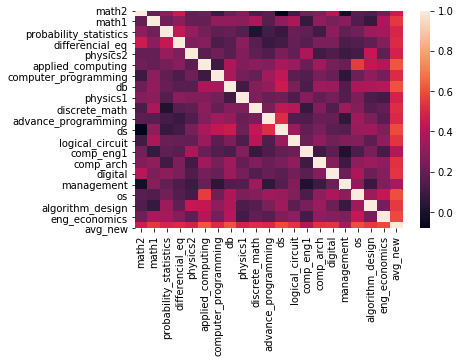

In [32]:
sns.heatmap(new_df.corr(),xticklabels=new_df.corr().columns,yticklabels=new_df.corr().columns)

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split

In [34]:
X = dataframe[['computer_programming','advance_programming','ds','algorithm_design']]

In [35]:
new_df['status'] = lb.fit_transform(new_df['status'])

In [36]:
y_new = new_df['status']

In [37]:
y_new

122    1
174    0
183    1
197    1
129    1
      ..
71     1
72     1
83     1
161    0
44     1
Name: status, Length: 2000, dtype: int64

In [38]:
y.value_counts()

1    231
0      6
Name: status, dtype: int64

In [39]:
X.head()

,computer_programming,advance_programming,ds,algorithm_design
0,20.0,20.0,18.5,16.2
1,10.0,5.5,10.0,15.5
2,15.6,11.0,14.0,18.2
3,9.5,10.0,11.5,14.0
4,9.9,15.2,13.0,12.0


In [40]:
y_new.value_counts()

1    1607
0     393
Name: status, dtype: int64

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [42]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [43]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))    
        

# Decision Tree

In [44]:
clf = DecisionTreeClassifier(random_state=42)

In [45]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [46]:
print_score(clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00       162

    accuracy                           1.00       165
   macro avg       1.00      1.00      1.00       165
weighted avg       1.00      1.00      1.00       165


Confusion Matrix: 
 [[  3   0]
 [  0 162]]

Average Accuracy: 	 0.9526
Accuracy SD: 		 0.0577


/home/yazdan/.local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [47]:
print_score(clf, X_train, y_train, X_test, y_test, train=False) # Test

Test Result:

accuracy score: 0.9583

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.96      1.00      0.98        69

    accuracy                           0.96        72
   macro avg       0.48      0.50      0.49        72
weighted avg       0.92      0.96      0.94        72


Confusion Matrix: 
 [[ 0  3]
 [ 0 69]]



/home/yazdan/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yazdan/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yazdan/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Bagging (oob_score=False)

In [48]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=1000,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

In [49]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=1000, n_jobs=-1, random_state=42)

In [50]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00       162

    accuracy                           1.00       165
   macro avg       1.00      1.00      1.00       165
weighted avg       1.00      1.00      1.00       165


Confusion Matrix: 
 [[  3   0]
 [  0 162]]



/home/yazdan/.local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Average Accuracy: 	 0.9702
Accuracy SD: 		 0.0397


In [51]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.9583



/home/yazdan/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yazdan/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yazdan/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.96      1.00      0.98        69

    accuracy                           0.96        72
   macro avg       0.48      0.50      0.49        72
weighted avg       0.92      0.96      0.94        72


Confusion Matrix: 
 [[ 0  3]
 [ 0 69]]



## Bagging (oob_score=True)

Use out-of-bag samples to estimate the generalization accuracy

In [52]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=1000,
                            bootstrap=True, oob_score=True,
                            n_jobs=-1, random_state=42)

In [53]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=1000, n_jobs=-1, oob_score=True,
                  random_state=42)

In [54]:
bag_clf.oob_score_

0.9696969696969697

In [55]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00       162

    accuracy                           1.00       165
   macro avg       1.00      1.00      1.00       165
weighted avg       1.00      1.00      1.00       165


Confusion Matrix: 
 [[  3   0]
 [  0 162]]



/home/yazdan/.local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Average Accuracy: 	 0.9702
Accuracy SD: 		 0.0397


In [56]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.9583



/home/yazdan/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yazdan/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yazdan/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.96      1.00      0.98        69

    accuracy                           0.96        72
   macro avg       0.48      0.50      0.49        72
weighted avg       0.92      0.96      0.94        72


Confusion Matrix: 
 [[ 0  3]
 [ 0 69]]



# Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [59]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))   

In [60]:
rf_clf = RandomForestClassifier(random_state=42)

In [61]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [62]:
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00       207

    accuracy                           1.00       213
   macro avg       1.00      1.00      1.00       213
weighted avg       1.00      1.00      1.00       213


Confusion Matrix: 
 [[  6   0]
 [  0 207]]



/home/yazdan/.local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Average Accuracy: 	 0.9768
Accuracy SD: 		 0.0232


In [63]:
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.9583

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.96      0.98        24

    accuracy                           0.96        24
   macro avg       0.50      0.48      0.49        24
weighted avg       1.00      0.96      0.98        24


Confusion Matrix: 
 [[ 0  0]
 [ 1 23]]



/home/yazdan/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yazdan/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yazdan/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Grid Search

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [65]:
rf_clf = RandomForestClassifier(random_state=42)

In [66]:
params_grid = {"max_depth": [3, None],
               "min_samples_split": [2, 3, 10],
               "min_samples_leaf": [1, 3, 10],
               "bootstrap": [True, False],
               "criterion": ['gini', 'entropy']}

In [67]:
grid_search = GridSearchCV(rf_clf, params_grid,
                           n_jobs=-1, cv=5,
                           verbose=1, scoring='accuracy')

In [68]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   21.6s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, None], 'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy', verbose=1)

In [69]:
grid_search.best_score_

0.9766334440753045

In [70]:
grid_search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [71]:
print_score(grid_search, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.9812

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.98      1.00      0.99       207

    accuracy                           0.98       213
   macro avg       0.99      0.67      0.75       213
weighted avg       0.98      0.98      0.98       213


Confusion Matrix: 
 [[  2   4]
 [  0 207]]

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/home/yazdan/.local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   21.3s finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   21.7s finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   20.9s finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   21.0s finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   21.1s finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   21.1s finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   21.0s finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   21.2s finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   21.0s finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   21.0s finished


Average Accuracy: 	 0.9768
Accuracy SD: 		 0.0232


In [72]:
print_score(grid_search, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.9583

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.96      0.98        24

    accuracy                           0.96        24
   macro avg       0.50      0.48      0.49        24
weighted avg       1.00      0.96      0.98        24


Confusion Matrix: 
 [[ 0  0]
 [ 1 23]]



/home/yazdan/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yazdan/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yazdan/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Support Vector Machine(SVM)

In [73]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import mlxtend
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

In [74]:
X = dataframe[['computer_programming','advance_programming','ds','algorithm_design']]
X_train, X_std_test, y_train, y_test = train_test_split(X, y,
                                                        train_size=0.8, 
                                                        random_state=0)

In [75]:
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

In [76]:
C = 2.0 #1.0 0.01
#clf = svm.SVC(kernel='poly', degree=6, C=C,gamma=0.25) #5
clf.fit(X_std_train, y_train)
clf = svm.SVC(kernel='rbf', gamma=0.25, C=C)

In [77]:
res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

Average Accuracy: 	 0.9737
Accuracy SD: 		 0.0263


/home/yazdan/.local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [78]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)

In [79]:
confusion_matrix(y_train, y_train_pred)

array([[  0,   5],
       [  0, 184]])

In [80]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_train, 
                                                           y_train_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_train,
                                                     y_train_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_train,
                                             y_train_pred, 
                                             average='weighted')))

Precision Score: 	 0.9478
Recall Score: 		 0.9735
F1 Score: 		 0.9605


/home/yazdan/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)

In [82]:
clf.fit(X_train2, y_train)

SVC(C=2.0, gamma=0.25)

In [83]:
y_train = np.array(y_train)

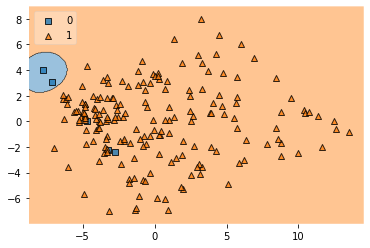

In [84]:
plot_decision_regions(X_train2, y_train, clf=clf, legend=2)

## grid search 

In [85]:
from sklearn.pipeline import Pipeline 

In [86]:
pipeline = Pipeline([('clf', svm.SVC(kernel='rbf', C=1, gamma=0.1))]) 

In [87]:
params = {'clf__C':(0.1, 0.5, 1, 2, 5, 10, 20), 
          'clf__gamma':(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)} 

In [88]:
svm_grid_rbf = GridSearchCV(pipeline, params, n_jobs=-1,
                            cv=3, verbose=1, scoring='accuracy') 

In [89]:
svm_grid_rbf.fit(X_train, y_train) 

Fitting 3 folds for each of 49 candidates, totalling 147 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:    0.4s finished


GridSearchCV(cv=3, estimator=Pipeline(steps=[('clf', SVC(C=1, gamma=0.1))]),
             n_jobs=-1,
             param_grid={'clf__C': (0.1, 0.5, 1, 2, 5, 10, 20),
                         'clf__gamma': (0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)},
             scoring='accuracy', verbose=1)

In [90]:
svm_grid_rbf.best_score_

0.9841269841269842

In [91]:
best = svm_grid_rbf.best_estimator_.get_params() 

In [92]:
for k in sorted(params.keys()): 
    print('\t{0}: \t {1:.2f}'.format(k, best[k]))

	clf__C: 	 2.00
	clf__gamma: 	 0.25


#  Evaluation of each model

In [93]:
def print_metrics(y_true,y_predicted):

    ## printing usual metrics
    print('Mean Square Error = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error = ' + str(sklm.mean_absolute_error(y_true,y_predicted)))

In [94]:
def hist_residuals(y_test,y_Score):
    #Compute vector of residuals
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    #plotting
    sns.distplot(resids)
    plt.title('Histogram of Residuals')
    plt.xlabel('Residual Value')
    plt.ylabel('Count')

In [95]:
def resid_qq(y_test,y_score):
    ## computing vectors of residuals
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    #plotting
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals VS predicted values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')

In [96]:
def resid_plot(y_test,y_score):
    ## computing vectors of residuals
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    #plotting
    sns.regplot(y_score,resids, fit_reg=False)
    plt.title('Residuals VS predicted values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')

# Regression ( 5 lessons one Reg )¶


In [97]:
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as pyplot
from sklearn import metrics as sklm
from sklearn.linear_model import RANSACRegressor
from matplotlib import style
sns.set_style('whitegrid')

In [98]:
predict = "4th_Semester_avg"
new_drop = [ 'math1', 'physics1', 'math2',
       'physics2', 'differencial_eq',
       'probability_statistics', 'ds', 'logical_circuit', 'comp_eng1',
       'comp_arch', 'digital', 'management', 'os',
       'db', 'eng_economics', '4th_Semester_avg']
x = np.array(dataframe.drop(new_drop,1))
y = np.array(dataframe[predict])

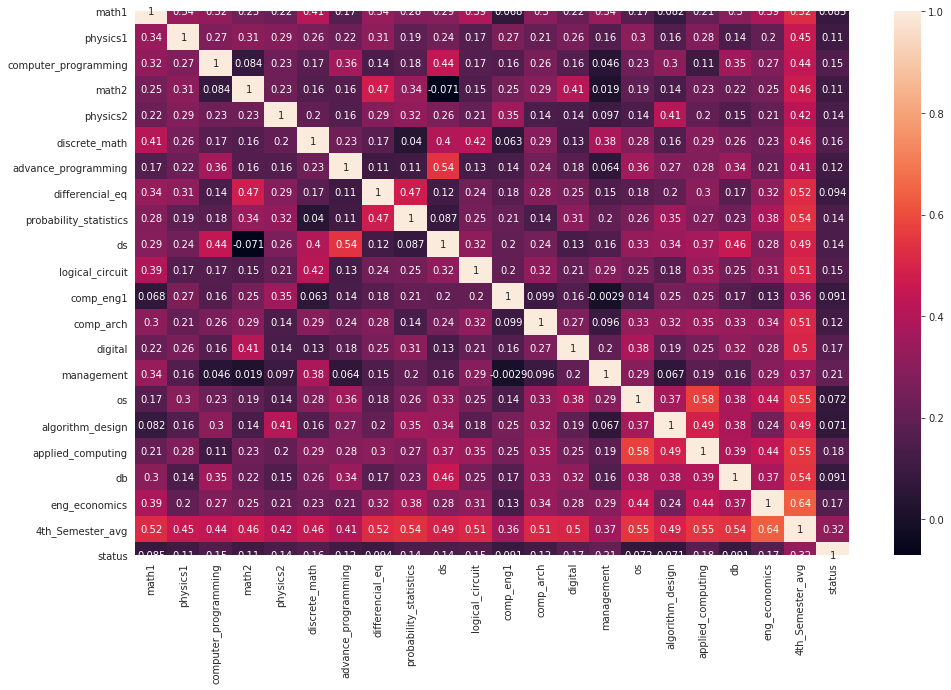

In [99]:
dataframe.corr()
plt.figure(figsize=(16,10))
sns.heatmap(dataframe.corr(),annot=True)

In [100]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y , test_size=0.3)

In [101]:
linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)

LinearRegression()

In [102]:
acc = linear.score(x_test, y_test)
print(acc)

0.3594610749358067


In [103]:
linear.coef_

array([0.12959677, 0.07638528, 0.06139135, 0.08598275, 0.16061141,
       1.52520592])

In [104]:
linear.intercept_

6.023374516456734

In [105]:
predictions = linear.predict(x_test)

for i in range(len(predictions)):
    print("Predictions : " , predictions[i],"  Tests  :", x_test[i], y_test[i])

Predictions :  13.351525013493802   Tests  : [ 9.75 13.65 13.52 10.   11.25  1.  ] 13.17
Predictions :  15.167261126855186   Tests  : [14.25 17.75 10.   14.8  15.75  1.  ] 14.61
Predictions :  14.035436502287531   Tests  : [ 9.   14.   14.   12.36 14.5   1.  ] 15.22
Predictions :  14.086932928800822   Tests  : [ 8.5  12.   11.6  13.   16.75  1.  ] 14.05
Predictions :  14.844502209838605   Tests  : [19.5 11.  19.9 10.  11.5  1. ] 13.54
Predictions :  15.313472819067348   Tests  : [15.   11.5  12.6  20.   15.25  1.  ] 15.59
Predictions :  11.230534915833733   Tests  : [ 9.75 10.    9.69 11.85  9.75  0.  ] 11.79
Predictions :  13.6549658340451   Tests  : [10.7  11.    9.27 13.75 13.25  1.  ] 14.08
Predictions :  14.883818316427352   Tests  : [12.   18.5  16.25 10.7  15.25  1.  ] 16.25
Predictions :  15.574986904437896   Tests  : [18.   12.   17.   14.   15.75  1.  ] 14.13
Predictions :  13.65567507766144   Tests  : [ 9.75 11.   10.   11.4  15.    1.  ] 13.2
Predictions :  16.1046689996007

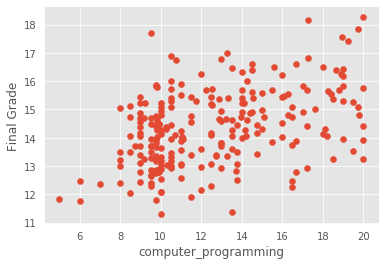

In [106]:
p = 'computer_programming'
style.use("ggplot")
pyplot.scatter(dataframe[p],dataframe["4th_Semester_avg"])
pyplot.xlabel(p)
pyplot.ylabel("Final Grade")
pyplot.show()

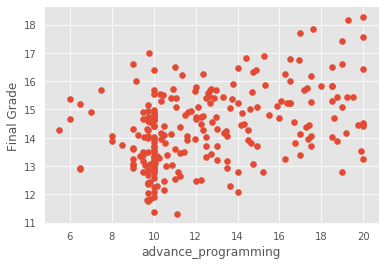

In [107]:
p = 'advance_programming'
style.use("ggplot")
pyplot.scatter(dataframe[p],dataframe["4th_Semester_avg"])
pyplot.xlabel(p)
pyplot.ylabel("Final Grade")
pyplot.show()

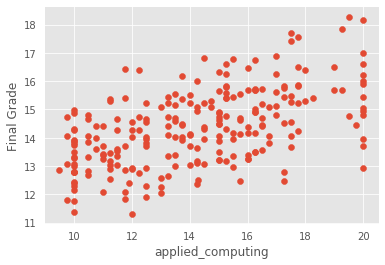

In [108]:
p = 'applied_computing'
style.use("ggplot")
pyplot.scatter(dataframe[p],dataframe["4th_Semester_avg"])
pyplot.xlabel(p)
pyplot.ylabel("Final Grade")
pyplot.show()

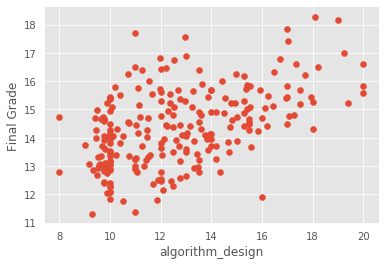

In [109]:
p = 'algorithm_design'
style.use("ggplot")
pyplot.scatter(dataframe[p],dataframe["4th_Semester_avg"])
pyplot.xlabel(p)
pyplot.ylabel("Final Grade")
pyplot.show()

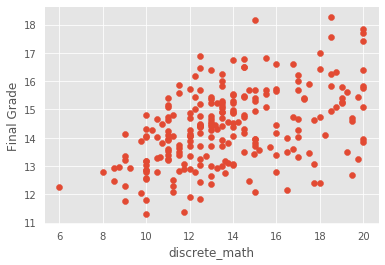

In [110]:
p = 'discrete_math'
style.use("ggplot")
pyplot.scatter(dataframe[p],dataframe["4th_Semester_avg"])
pyplot.xlabel(p)
pyplot.ylabel("Final Grade")
pyplot.show()

In [111]:
y_score = linear.predict(x_test)
print_metrics(y_test, y_score)

Mean Square Error = 1.1679912836438258
Root Mean Square Error = 1.0807364542957851
Mean Absolute Error = 0.8470261768798774


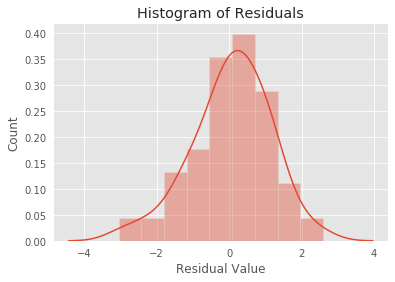

In [112]:
hist_residuals(y_test, y_score)

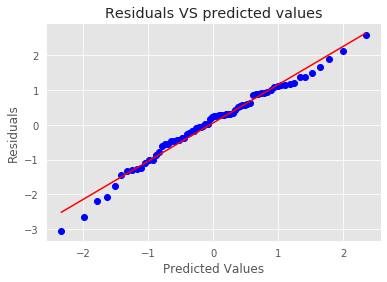

In [113]:
resid_qq(y_test,y_score)

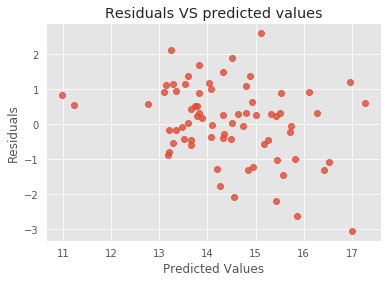

In [114]:
resid_plot(y_test,y_score)

# Ransac Algorithm

In [115]:
ransac = RANSACRegressor()

In [116]:
ransac.fit(x,y)

RANSACRegressor()

In [117]:
ransac.estimator_.coef_

array([0.14644161, 0.26788321, 0.04672545, 0.11246534, 0.08107001,
       0.61555954])

In [118]:
ransac.estimator_.intercept_

5.241081324094523

In [130]:
X = new_df.iloc[:, :-2]

In [131]:
X

,math2,math1,probability_statistics,differencial_eq,physics2,applied_computing,computer_programming,db,physics1,discrete_math,advance_programming,ds,logical_circuit,comp_eng1,comp_arch,digital,management,os,algorithm_design,eng_economics
122,10.25,10.25,15.00,11.25,13.50,16.50,12.75,14.25,10.25,15.75,13.12,12.77,13.75,18.50,9.75,9.25,17.00,13.88,12.78,14.25
174,7.25,11.25,9.15,9.25,9.25,10.25,6.25,10.00,11.75,8.75,9.50,9.75,11.75,10.25,11.75,10.00,11.75,10.50,10.25,10.75
183,19.25,11.25,12.65,17.50,10.25,14.50,16.75,19.25,12.75,10.75,14.68,10.46,8.75,12.50,14.15,14.50,15.25,17.25,12.99,18.75
197,19.75,11.25,15.65,10.25,13.25,14.75,9.25,16.75,17.75,13.75,13.75,10.17,8.75,16.00,15.35,17.00,16.75,17.75,12.11,16.00
129,13.00,11.25,14.50,10.25,13.25,20.25,16.25,20.25,16.00,12.75,18.50,15.52,14.75,18.50,11.75,14.75,16.00,17.94,17.70,15.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,9.25,10.25,12.50,11.75,7.25,11.00,14.25,14.75,11.65,16.25,9.50,13.41,17.75,12.00,14.75,13.75,19.75,16.25,9.19,14.25
72,15.75,19.25,15.75,15.75,14.75,18.25,14.75,13.25,11.55,19.75,14.65,16.25,19.75,15.75,17.25,10.75,19.75,17.00,13.25,19.75
83,13.25,19.75,14.25,18.25,12.25,17.25,14.75,16.25,13.65,19.00,14.45,15.50,16.00,14.50,13.75,14.75,15.00,15.50,11.75,18.75
161,9.25,10.25,8.45,9.25,10.25,14.50,10.75,15.50,9.25,16.75,8.90,11.21,13.75,16.25,9.75,11.25,14.75,11.75,11.27,14.50


# Adding Deep Layers for Prediction

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size = 0.3, random_state = 42)

In [133]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [134]:
len(X_train)

1400

In [135]:
len(y_test)

600

In [136]:
new_df.head(10)

,math2,math1,probability_statistics,differencial_eq,physics2,applied_computing,computer_programming,db,physics1,discrete_math,...,logical_circuit,comp_eng1,comp_arch,digital,management,os,algorithm_design,eng_economics,avg_new,status
122,10.25,10.25,15.00,11.25,13.50,16.50,12.75,14.25,10.25,15.75,...,13.75,18.50,9.75,9.25,17.00,13.88,12.78,14.25,13.2400,1
174,7.25,11.25,9.15,9.25,9.25,10.25,6.25,10.00,11.75,8.75,...,11.75,10.25,11.75,10.00,11.75,10.50,10.25,10.75,9.9700,0
183,19.25,11.25,12.65,17.50,10.25,14.50,16.75,19.25,12.75,10.75,...,8.75,12.50,14.15,14.50,15.25,17.25,12.99,18.75,14.2090,1
197,19.75,11.25,15.65,10.25,13.25,14.75,9.25,16.75,17.75,13.75,...,8.75,16.00,15.35,17.00,16.75,17.75,12.11,16.00,14.3015,1
129,13.00,11.25,14.50,10.25,13.25,20.25,16.25,20.25,16.00,12.75,...,14.75,18.50,11.75,14.75,16.00,17.94,17.70,15.00,15.4080,1
104,10.00,12.25,10.25,10.25,10.25,20.25,10.75,9.45,15.00,9.00,...,11.75,16.75,14.00,9.25,14.75,14.75,9.28,8.75,11.9025,0
87,8.75,10.25,9.25,9.25,7.25,10.25,13.75,14.25,11.65,11.50,...,8.75,11.75,15.75,9.25,17.00,12.93,10.75,9.75,11.0790,0
200,19.25,15.25,13.65,12.75,9.25,15.25,9.25,16.25,15.50,13.75,...,9.75,16.75,14.95,15.75,14.75,15.75,9.75,15.25,13.7800,1
50,9.75,12.25,9.75,9.25,6.25,16.00,16.75,14.25,10.75,8.25,...,14.25,18.35,16.75,10.75,17.75,16.00,11.75,12.75,12.5550,1
137,14.25,11.25,9.25,14.25,15.75,18.50,10.75,15.00,14.50,18.75,...,16.00,16.25,15.75,14.00,16.50,12.25,16.69,14.75,14.5675,1


In [137]:
X_train.shape

(1400, 20)

In [138]:
import keras
from keras.models import Sequential 
cf = Sequential()

Using TensorFlow backend.
/home/yazdan/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/yazdan/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/yazdan/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/yazdan/anaconda3/lib/python3.7/site-packages/tenso

In [139]:
from keras.layers import Dense
cf.add(Dense(units = 6, kernel_initializer ='uniform', activation = 'relu', input_dim = 20))

In [140]:
from keras.layers import Dropout
cf.add(Dropout(rate = 0.1))

In [141]:
cf.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
cf.add(Dropout(rate = 0.1))
cf.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [142]:
from ann_visualizer.visualize import ann_viz;
ann_viz(cf, title="");

In [143]:
cf.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [144]:
cf.fit(X_train, y_train, batch_size = 20, epochs = 100)


Epoch 1/100
1400/1400 [==============================] - 0s 198us/step - loss: 0.6812 - accuracy: 0.8036
Epoch 2/100
1400/1400 [==============================] - 0s 58us/step - loss: 0.6315 - accuracy: 0.8107
Epoch 3/100
1400/1400 [==============================] - 0s 73us/step - loss: 0.5128 - accuracy: 0.9221
Epoch 4/100
1400/1400 [==============================] - 0s 72us/step - loss: 0.3962 - accuracy: 0.9129
Epoch 5/100
1400/1400 [==============================] - 0s 72us/step - loss: 0.3256 - accuracy: 0.9229
Epoch 6/100
1400/1400 [==============================] - 0s 76us/step - loss: 0.2803 - accuracy: 0.9493
Epoch 7/100
1400/1400 [==============================] - 0s 68us/step - loss: 0.2423 - accuracy: 0.9621
Epoch 8/100
1400/1400 [==============================] - 0s 61us/step - loss: 0.2200 - accuracy: 0.9693
Epoch 9/100
1400/1400 [==============================] - 0s 60us/step - loss: 0.2031 - accuracy: 0.9743
Epoch 10/100
1400/1400 [==============================] - 0s 6

1400/1400 [==============================] - 0s 51us/step - loss: 0.0159 - accuracy: 0.9986
Epoch 78/100
1400/1400 [==============================] - 0s 54us/step - loss: 0.0168 - accuracy: 0.9971
Epoch 79/100
1400/1400 [==============================] - 0s 53us/step - loss: 0.0136 - accuracy: 0.9986
Epoch 80/100
1400/1400 [==============================] - 0s 76us/step - loss: 0.0147 - accuracy: 0.9993
Epoch 81/100
1400/1400 [==============================] - 0s 82us/step - loss: 0.0102 - accuracy: 1.0000
Epoch 82/100
1400/1400 [==============================] - 0s 65us/step - loss: 0.0127 - accuracy: 0.9993
Epoch 83/100
1400/1400 [==============================] - 0s 59us/step - loss: 0.0132 - accuracy: 0.9986
Epoch 84/100
1400/1400 [==============================] - 0s 71us/step - loss: 0.0113 - accuracy: 0.9993
Epoch 85/100
1400/1400 [==============================] - 0s 60us/step - loss: 0.0128 - accuracy: 0.9993
Epoch 86/100
1400/1400 [==============================] - 0s 61us/st

In [145]:
y_prediction =cf.predict(X_test)

In [146]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [147]:
def kera_classifier():
    cf = Sequential()
    cf.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 20))
    cf.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    cf.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    cf.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return cf

In [148]:
cf = KerasClassifier(build_fn = kera_classifier, batch_size = 10, epochs = 100)

In [149]:
accuracies = cross_val_score(estimator = cf, X = X_train, y = y_train, cv = 10, n_jobs = -1)
mean = accuracies.mean()
variance = accuracies.std()

In [150]:
mean

0.9992857158184052

In [151]:
variance

0.002142852544784546